In [1]:
# Import packages
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import os
import warnings
import glob
import baseline

In [2]:
df=pd.read_csv('../Rawdata/PadraoK3_Gaiola_cell3eletrodos.txt', sep='\t')
df.head()

,E /V,I /uA,I /uA.1
0,0.500,0.130,7.040
1,0.499,0.102,6.998
2,0.498,0.083,6.964
3,0.497,0.064,6.932
4,0.496,0.061,6.908


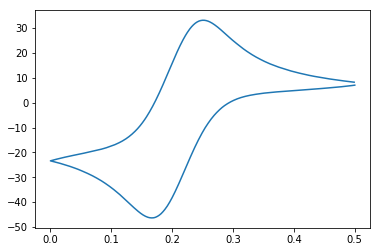

In [3]:
%matplotlib inline
plt.plot(df['E /V'],df['I /uA.1'])

In [4]:
x = pd.to_numeric(df['E /V'])
y = pd.to_numeric(df['I /uA.1'])

In [5]:
x1,x2=baseline.split(x)
y1,y2=baseline.split(y)

In [6]:
len(x)

1000

In [7]:
baseline.critical_idx(x1,y1)

40

In [14]:
def mean(vector):
    """
    This function returns the mean values.
    """
    a = 0
    for i in vector:
        a = a + i
    return a/len(vector)
def linear_coeff(x, y):
    """
    This function returns the inclination coeffecient and y axis interception coeffecient m and b. 
    """
    m = (y-mean(y)) / (x - mean(x))    
    b = mean(y) - m * mean(x)
    return m, b

In [15]:
linear_coeff(x1,y1)

(array([   88.09118236,    88.27665996,    88.4959596 ,    88.72515213,
           88.98879837,    89.20143149,    89.44455852,    89.69381443,
           89.95341615,    90.20686071,    90.46659708,    90.72012579,
           90.98      ,    91.25052854,    91.514862  ,    91.78144989,
           92.0503212 ,    92.33870968,    92.62958963,    92.9143167 ,
           93.20588235,    93.49562363,    93.8010989 ,    94.10927152,
           94.4113082 ,    94.70712695,    95.03691275,    95.34719101,
           95.65575621,    95.98979592,    96.34510251,    96.72196796,
           97.07931034,    97.42147806,    97.76218097,    98.11538462,
           98.47189696,    98.80352941,    99.14775414,    99.51900238,
           99.92243437,   100.32494005,   100.70722892,   101.08353511,
          101.46836983,   101.88141809,   102.27395577,   102.68518519,
          103.09057072,   103.5       ,   103.9235589 ,   104.34130982,
          104.75822785,   105.17430025,   105.59974425,   106.02

In [10]:
#find linear backgroud
y_pred1 = baseline.linear_background(x1,y1)
y_pred2 = baseline.linear_background(x2,y2)
y_pred1

[array([6.88520441, 6.88086569, 6.87146332, 6.85612925, 6.85696681,
        6.84420276, 6.82674713, 6.82244621, 6.83105714, 6.85594824,
        6.8653424 , 6.85881955, 6.8457619 , 6.84055556, 6.83374725,
        6.77809957, 6.71660847, 6.68069388, 6.71804762, 6.77687302,
        6.646     , 7.20861905, 6.99274603, 6.86457143, 6.87035374,
        6.8452328 , 6.8447013 , 6.84433333, 6.83273016, 6.83385714,
        6.83922055, 6.84760998, 6.85084472, 6.8535619 , 6.84958025,
        6.85494089, 6.85412596, 6.85083405, 6.84306122, 6.8338314 ,
        6.8299072 , 6.82429268]),
 array([6.86319512, 6.85895849, 6.84977735, 6.83480408, 6.83562193,
        6.82315822, 6.8061133 , 6.80191358, 6.8103219 , 6.83462733,
        6.84380045, 6.83743108, 6.82468067, 6.81959683, 6.81294872,
        6.75861039, 6.69856614, 6.6634966 , 6.69997143, 6.7574127 ,
        6.62961905, 7.179     , 6.96820635, 6.84304762, 6.84869388,
        6.82416402, 6.82364502, 6.82328571, 6.81195556, 6.81305602,
        6.8182

In [9]:
#cathodic peak current and potential
max_pos = y2.argmax()
max_pot = x2[max_pos]
max_cur = y2[max_pos] - y_pred2[max_pos]
#Anodic peak current and potential
min_pos = y1.argmin()
min_pot = x1[min_pos]
min_cur = y1[min_pos] - y_pred1[min_pos]
f"For this CV data, the 'Ipc' is {max_cur}, Vpc is {max_pot}, Ipa is {min_cur}, Vpa is {min_pot}"

"For this CV data, the 'Ipc' is [43.31026494 43.3264407  43.3362577  43.33893732 43.36667477 43.34501111\n 43.34847176 43.34278223 43.31656044 43.30853089 43.26624082 43.25418831\n 43.26567742 43.23850985 43.25053968 43.21781429 43.17939752 43.15218707\n 43.09877444 43.00991176 42.84548571 42.69031319 42.62016883 42.34596032\n 42.13734694 41.68404286 40.756      36.89378571 49.64742857 45.52588095\n 44.70157143 44.29272449 44.23847619 44.16859091 44.06036264 43.98099524\n 43.85165546 43.70859774 43.64836054 43.54786025 43.54124    43.50678571\n 43.46366995 43.42611751 43.381329   43.31943061 43.2326834  43.13488462\n 43.07509059 43.0208588  42.99738095 42.91796505 42.82915452 42.75493697\n 42.66430189 42.54489481], Vpc is 0.251, Ipa is [-45.92611034 -45.95576679 -46.02003475 -46.12484762 -46.11912266\n -46.20636866 -46.32568309 -46.35508113 -46.29622286 -46.12608489\n -46.06187302 -46.10645865 -46.19571148 -46.23129841 -46.27783516\n -46.65820346 -47.07851323 -47.324      -47.06867619 

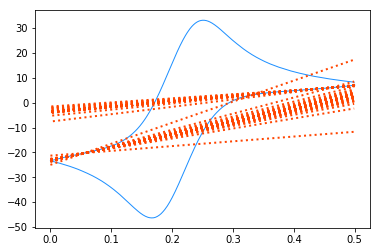

In [11]:
## Plot all data 
plt.plot(x1, y1, 'dodgerblue',linewidth=1) ##darkgrey
plt.plot(x2, y2, 'dodgerblue', linewidth=1) ##dodgerblue  
plt.plot(x1, y_pred1, color = "orangered", linestyle=':',linewidth=2) 
plt.plot(x2, y_pred2, color = "orangered", linestyle=':',linewidth=2) 

test.txt Opened
1
2
executed


/Users/sabiha/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


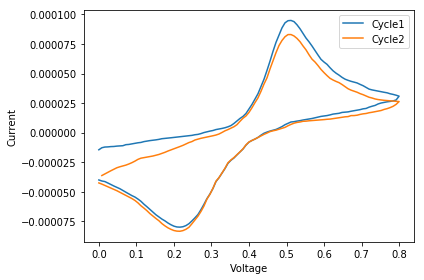

In [15]:
import file_read

In [16]:
dict_1, n_cycle = file_read.read_file('test.txt')

test.txt Opened


In [17]:
df = file_read.data_frame(dict_1, 2)

In [18]:
df.shape

(200, 2)

In [19]:
#c using a b for x and y
a = pd.to_numeric(df['Potential'])
b = pd.to_numeric(df['Current'])

In [20]:
a1,a2=baseline.split_vector(a)
b1,b2=baseline.split_vector(b)
len(b1)

100

10

/Users/sabiha/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


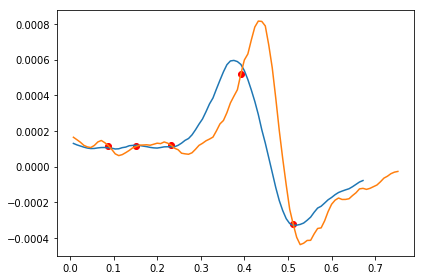

In [21]:
baseline.finds_critical_idx(a1,b1)

/Users/sabiha/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


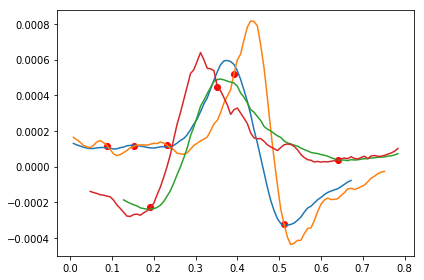

In [22]:
#find linear backgroud
b_pred1 = baseline.calc_linear_background(a1,b1)
b_pred2 = baseline.calc_linear_background(a2,b2)

/Users/sabiha/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


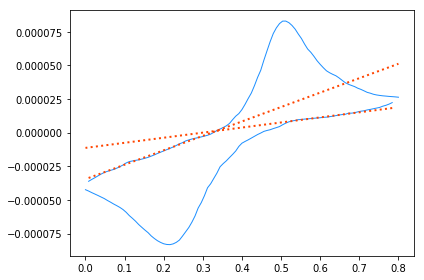

In [23]:
#Plot all data 
plt.plot(a1, b1, 'dodgerblue',linewidth=1) ##darkgrey
plt.plot(a2, b2, 'dodgerblue', linewidth=1) ##dodgerblue  
plt.plot(a1, b_pred1, color = "orangered", linestyle=':',linewidth=2) 
plt.plot(a2, b_pred2, color = "orangered", linestyle=':',linewidth=2) 

In [1]:
def sum_value(vetor):
    """
    This function returns the sum of values.
    """
    a = 0
    for x in vetor:
        a = a + x
    return a

In [29]:
def finds_critical_idx(x, y): ## Finds index where data set is no longer linear 
	
	dy = np.diff(y)/(np.diff(x))
	
	## Calculate moving average for 20 and 50 points
	ma20 = []
	ma50 = []

	for i in range(len(dy)-10): 
		soma = 0 
		for k in range(0,10):
			soma = soma + dy[i+k]
		ma20.append(round(soma/10, 3))
		
	for i in range(len(dy)-15): 
		soma = 0 
		for k in range(0,15):
			soma = soma + dy[i+k]
		ma50.append(round(soma/15, 3))

	## Find intercepts of different moving average curves
	ma20_num = np.array(ma20)
	ma50_num = np.array(ma50)
	idx = np.argwhere(np.diff(np.sign(ma50_num - ma20_num[:len(ma50)]))!= 0).reshape(-1)+0
	
	## Uncomment to check whats going on 
	plt.plot(x[idx], ma20_num[idx], 'ro') ## Plot intersections 
	plt.plot(x[0:len(ma50)], ma50, x[0:len(ma20)], ma20) ## Plot moving averages

	return int(idx[0])


In [43]:
dy = np.diff(b1)/(np.diff(a1))  #delta y / delta x
dy
#plt.plot(a1[:99],dy)

array([ 2.12359650e-04,  7.59458261e-05,  1.47706983e-05,  3.19062449e-05,
        1.25872898e-05,  3.83377012e-05,  1.96735192e-05,  2.34908495e-05,
        1.09549359e-04,  2.53721058e-05,  5.80418541e-05,  5.04594967e-05,
        6.45463802e-05,  3.68007948e-05,  8.75449403e-05,  5.74818523e-05,
        4.90839980e-05,  3.61796482e-05,  4.37086919e-05,  5.11552347e-05,
        6.97501569e-05,  3.02766355e-05,  3.18671005e-05,  3.74310559e-05,
        3.47881835e-05,  2.73076923e-05,  3.69101960e-05,  4.63836201e-05,
        3.60123085e-05,  3.09477612e-05,  4.06672520e-05,  6.60557918e-05,
        3.82596273e-05,  8.36054550e-05,  1.08846643e-04,  7.85610000e-05,
        7.54674363e-05,  6.19224052e-05,  9.97689810e-05,  5.57030959e-05,
        6.31023642e-05,  7.36772818e-05,  1.00196103e-04,  1.28744843e-04,
        2.23524384e-04,  2.59599901e-04,  2.68962312e-04,  2.14403704e-04,
        3.09163446e-04,  4.86659967e-04,  4.72844128e-04,  5.63352095e-04,
        5.63248935e-04,  

In [67]:
ma20=[]
for i in range(len(dy)-10): 
		soma = 0 
		for k in range(0,10):
			soma = soma + dy[i+k]
		ma20.append(round(soma/10, 8))
ma20

[5.64e-05,
 4.097e-05,
 3.842e-05,
 4.34e-05,
 4.389e-05,
 5.138e-05,
 5.33e-05,
 5.624e-05,
 5.751e-05,
 5.092e-05,
 5.35e-05,
 5.467e-05,
 5.265e-05,
 4.938e-05,
 4.945e-05,
 4.417e-05,
 4.115e-05,
 3.994e-05,
 4.096e-05,
 4.019e-05,
 3.817e-05,
 3.526e-05,
 3.884e-05,
 3.948e-05,
 4.409e-05,
 5.15e-05,
 5.662e-05,
 6.048e-05,
 6.203e-05,
 6.841e-05,
 7.089e-05,
 7.313e-05,
 7.389e-05,
 8.009e-05,
 8.46e-05,
 9.607e-05,
 0.00011417,
 0.00013352,
 0.00014877,
 0.00016971,
 0.0002128,
 0.00025378,
 0.00030275,
 0.00034905,
 0.00041256,
 0.00046658,
 0.00053358,
 0.00060422,
 0.00068645,
 0.00075056,
 0.00077742,
 0.00080832,
 0.00080505,
 0.00077133,
 0.00069781,
 0.00060889,
 0.00048271,
 0.00034329,
 0.00019121,
 4.626e-05,
 -6.892e-05,
 -0.00019137,
 -0.0002925,
 -0.00036256,
 -0.00041104,
 -0.0004268,
 -0.00041787,
 -0.00041166,
 -0.00039564,
 -0.00037084,
 -0.0003519,
 -0.00033112,
 -0.00030212,
 -0.00026701,
 -0.00023193,
 -0.00021165,
 -0.0001964,
 -0.00017586,
 -0.00015726,
 -0

In [49]:
max_pos = b1.argmax()
max_pot = a1[max_pos]
max_pot

0.511881

In [66]:
dy[64]

-0.0001255141468278697

In [2]:
# Check for all the modules that required if not exist then exit with notification.
import sys
import imp
try:
    imp.find_module('numpy')
    foundnp = True
except ImportError:
    foundnp = False
try:
    imp.find_module('matplotlib')
    foundplot = True
except ImportError:
    foundplot = False
try:
    imp.find_module('pandas')
    foundpd = True
except ImportError:
    foundplot = False
if not foundnp:
    print("Numpy is required. Exiting")
    sys.exit()
if not foundplot:
    print("Matplotlib is required. Exiting")
    sys.exit()
if not foundpd:
    print("Pandas is required. Exiting")
    sys.exit()

In [3]:
# This part use classification. All the following code blocks with correct indentation should be able to use the same style. 
# part of _init_
class cv:
    _colors = {'red': 'r', 'green': 'g', 'blue': 'b', 'yellow': 'y', 'cyan': 'c', 'magenta': 'm', 'black': 'k', 'white': 'w'}
    _linestyles = {' ': ' ', '-': 'solid', '--': 'dashed', '-.': 'dash_dot', ':': 'dotted'}
    _markers  = {' ': ' ', '.': '.', '_' : '_', 'o': 'o', '*': '*', '+': '+', 'x': 'x', 'square': 's', 'triangle': '^', 'diamond': 'd'}


In [4]:
# Find relevant files in folder
path = os.getcwd()
extension = ['csv','txt','dat'] # Should include all the possible ones
os.chdir(path)
result = [i for i in glob.glob('*.{}'.format(extension))]
print("Plotting the following:")
print(result)
#Make x-axis
t = np.linspace(325, 1100, 776)

Plotting the following:
[]
